# Tugas Besar

- Anggota Kelompok
1) Sulthan Nauval Abdillah - 1103213065
2) Cetta Maulana Andhika - 1103213119
3) Muhammad Hafizh Reyhan - 1103213072   

- Dataset : https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

# Import Library

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
import joblib

# Load Dataset

In [2]:
df = pd.read_csv("dataset\healthcare-dataset-stroke-data.csv")

# Preview Data

In [3]:
print("Preview Data:")
df.head()

Preview Data:


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
print("Sample Data:")
df.sample(10)

Sample Data:


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4505,35217,Female,60.0,1,0,Yes,Private,Urban,234.50,43.7,never smoked,0
4440,65636,Male,55.0,0,0,Yes,Private,Urban,82.26,28.7,Unknown,0
291,11014,Male,4.0,0,0,No,children,Rural,79.17,20.0,Unknown,0
3253,50001,Female,34.0,0,0,Yes,Govt_job,Rural,86.36,32.1,smokes,0
3484,41404,Female,37.0,0,0,Yes,Private,Rural,110.28,22.3,never smoked,0
1005,3437,Female,26.0,0,0,No,Private,Urban,82.61,28.5,smokes,0
226,32729,Female,81.0,0,0,Yes,Private,Rural,184.40,27.5,never smoked,1
1197,26031,Female,14.0,0,0,No,Private,Rural,84.46,21.8,Unknown,0
323,52134,Male,53.0,0,0,Yes,Private,Rural,90.12,35.4,Unknown,0
735,52808,Male,73.0,0,0,Yes,Private,Urban,84.11,27.9,never smoked,0


# Exploratory Data Analysis (EDA)

## Informasi Data

In [5]:
print("Info tentang data seperti tipe data, jumlah data non-null, dll. :\n")
df.info()

Info tentang data seperti tipe data, jumlah data non-null, dll. :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


## Statistik Deskriptif Data Numerik

In [6]:
print("Statistik Deskriptif :")
df.describe()

Statistik Deskriptif :


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## Analisis Korelasi Data Numerik

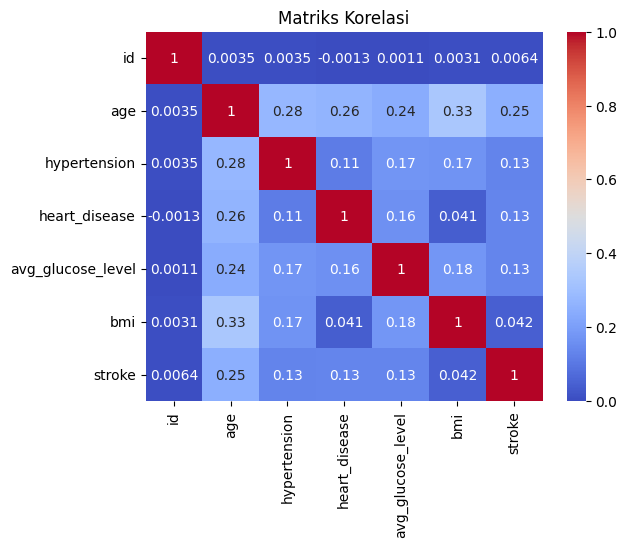

In [7]:
correlation_matrix = df.select_dtypes(include=['int', 'float']).corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriks Korelasi')
plt.show()

## Visualisasi Data

In [8]:
# Pembagian Jenis Dataset Dilihat dari Tipe Data

df_kategorikal = df.select_dtypes(include=['object'])
df_kategorikal = pd.concat([df_kategorikal, df[['hypertension', 'heart_disease', 'stroke']]], axis=1)

df_numerik = df.drop(columns=['id', 'hypertension', 'heart_disease', 'stroke']).select_dtypes(include=['int', 'float'])

### Pie Chart

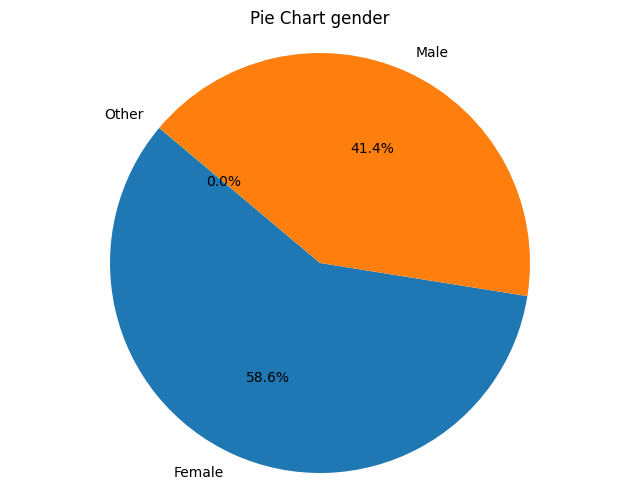

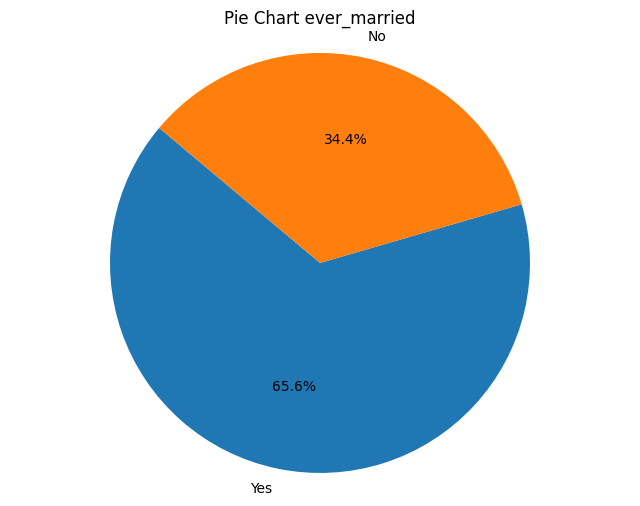

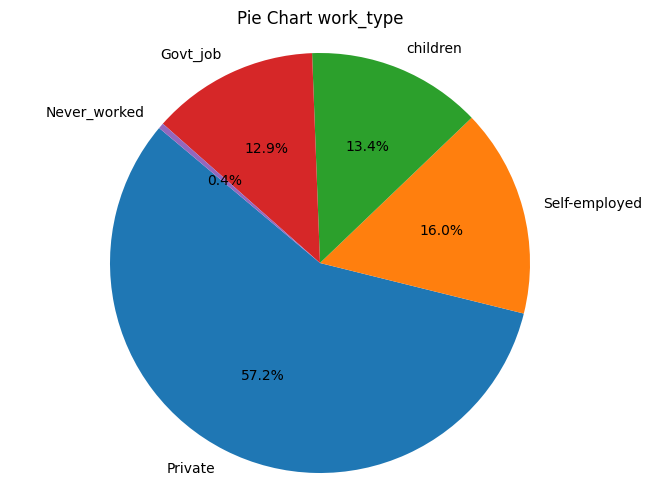

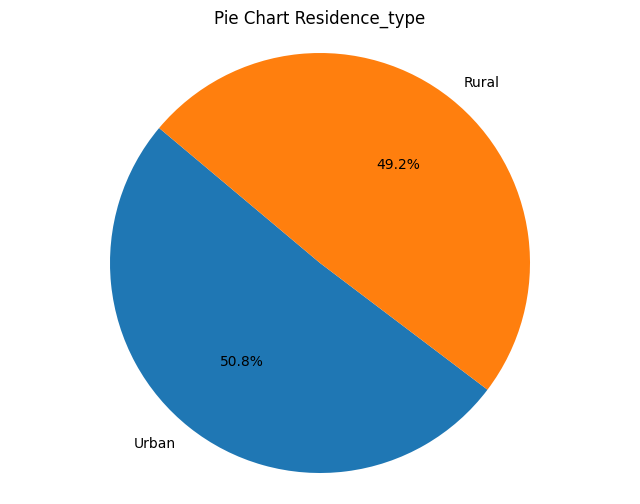

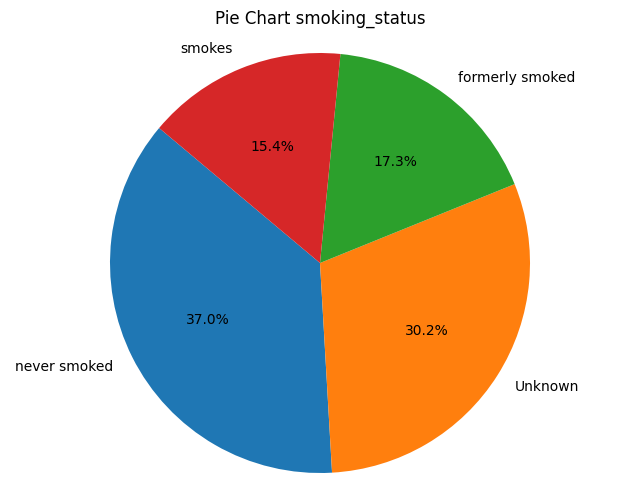

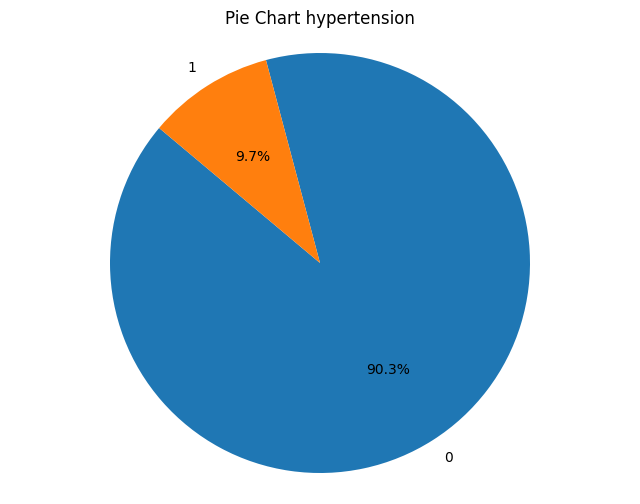

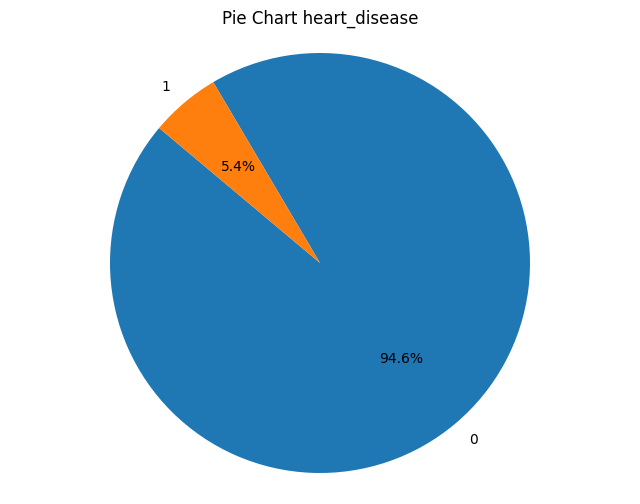

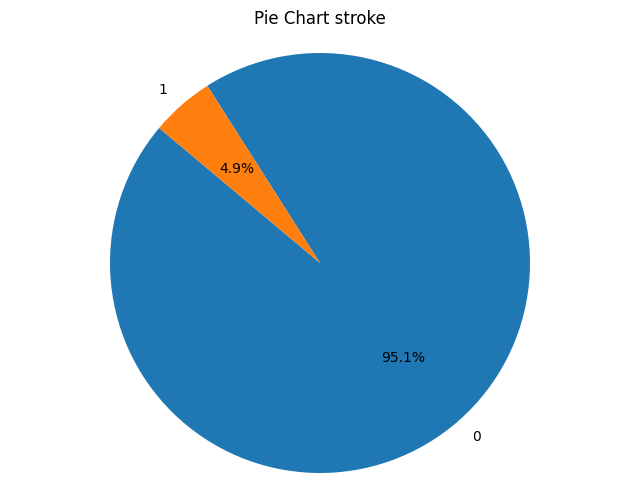

In [9]:
for column in df_kategorikal.columns:
    counts = df[column].value_counts()
    plt.figure(figsize=(8, 6))
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Pie Chart {column}')
    plt.axis('equal')  # Agar pie chart menjadi lingkaran
    plt.show()

### Bar Chart

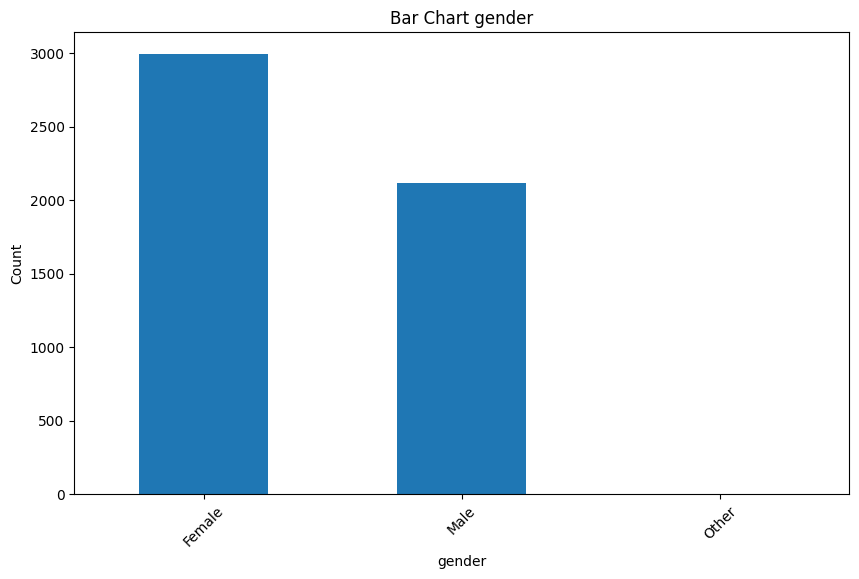

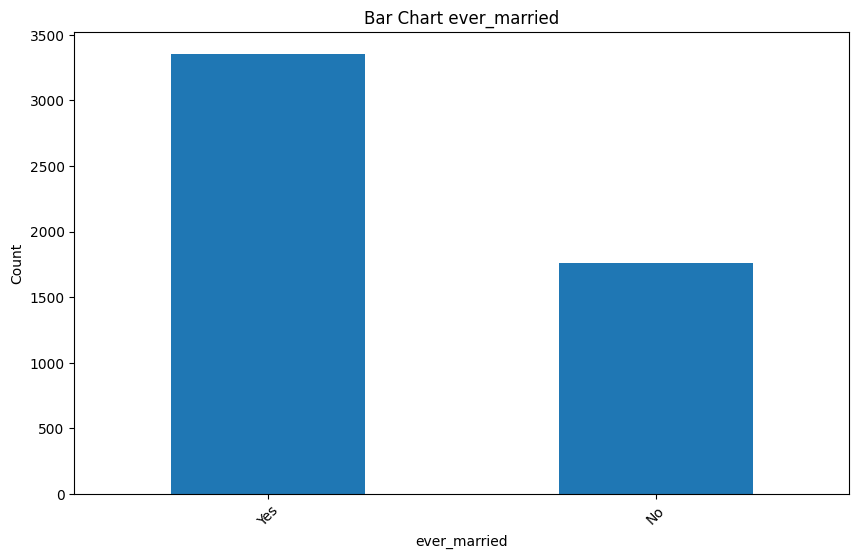

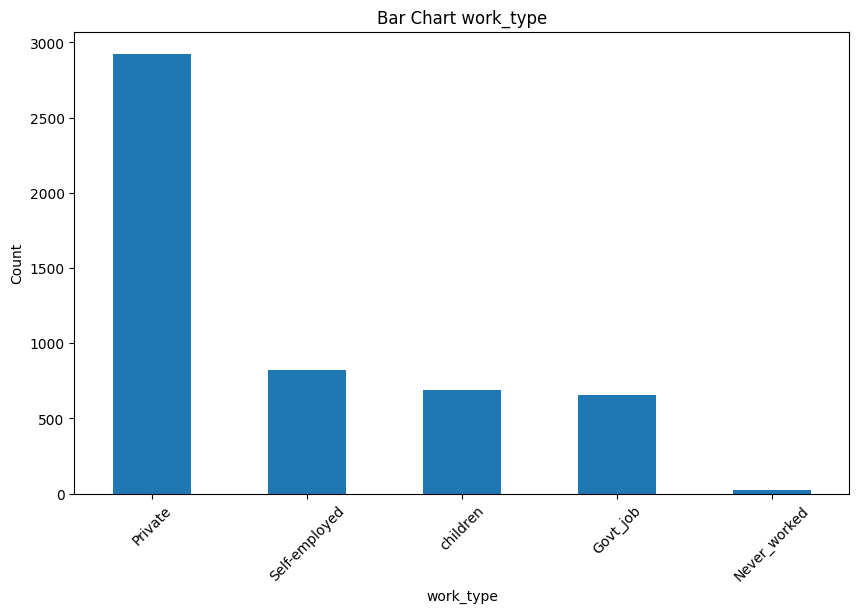

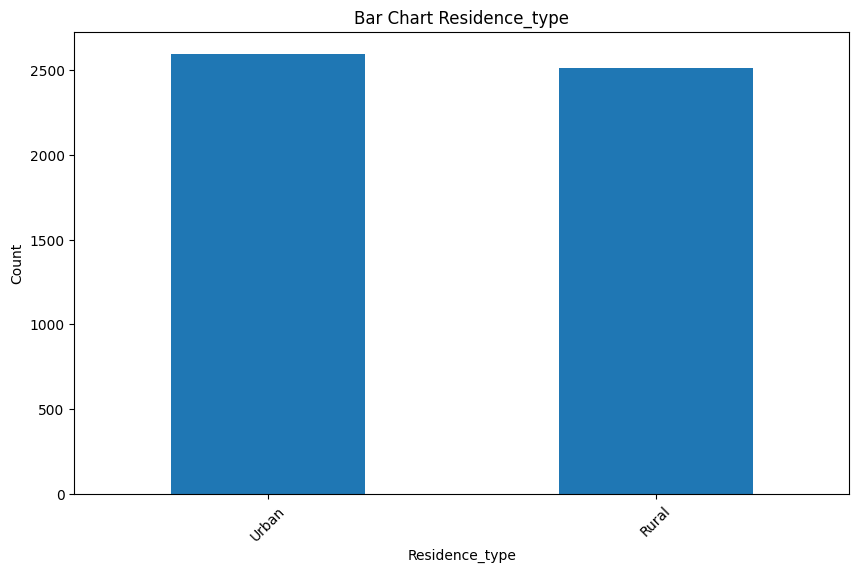

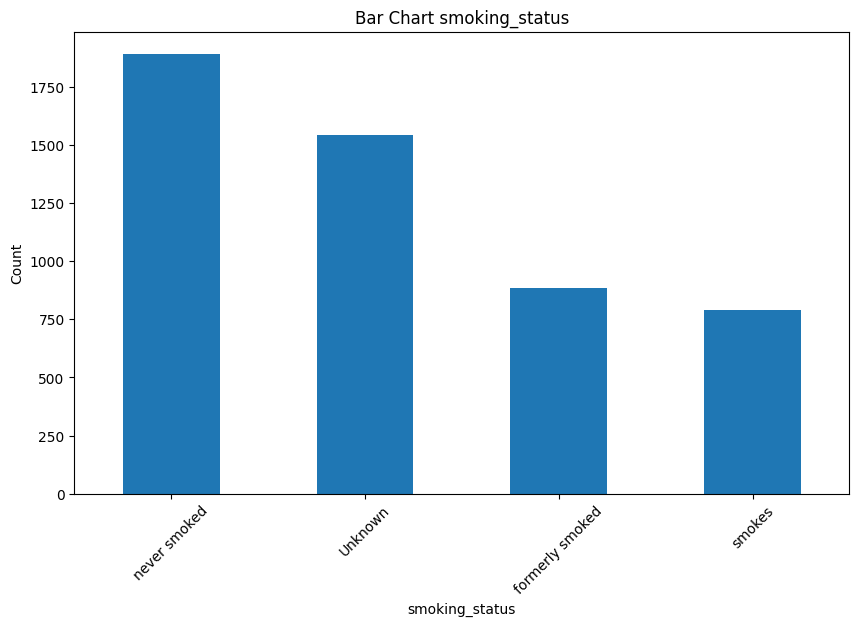

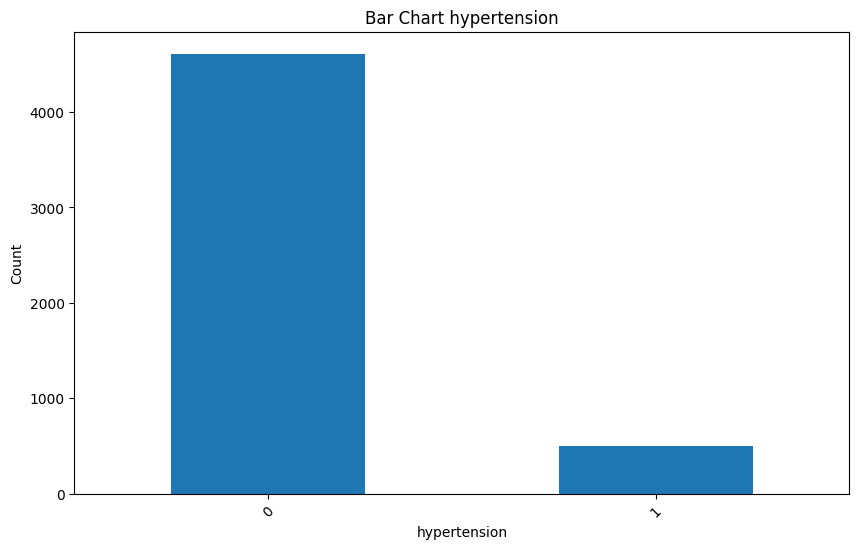

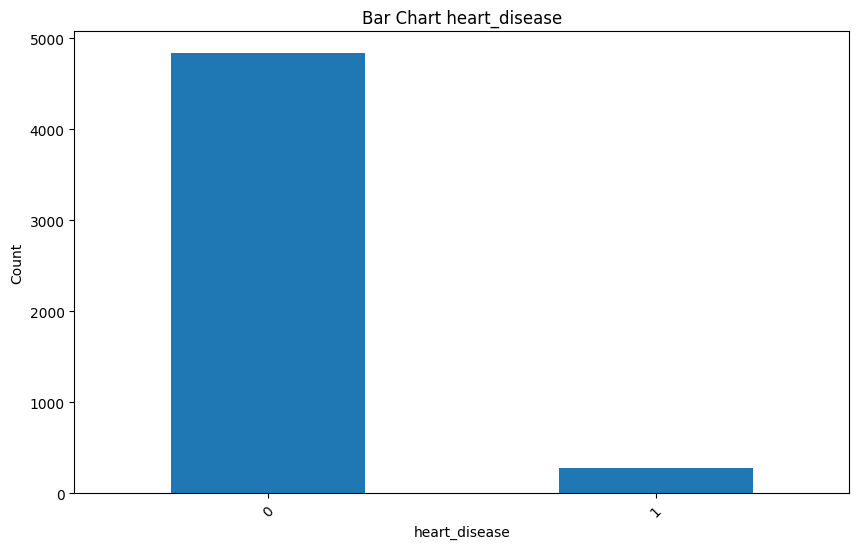

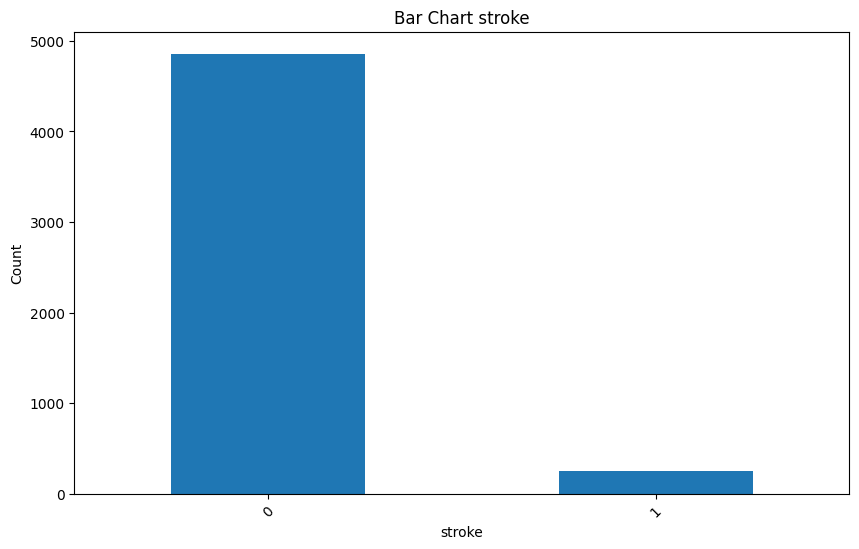

In [10]:
for column in df_kategorikal.columns:
    counts = df[column].value_counts()
    plt.figure(figsize=(10, 6))
    counts.plot(kind='bar')
    plt.title(f'Bar Chart {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # Rotasi label agar lebih mudah dibaca
    plt.show()

### Line Graph

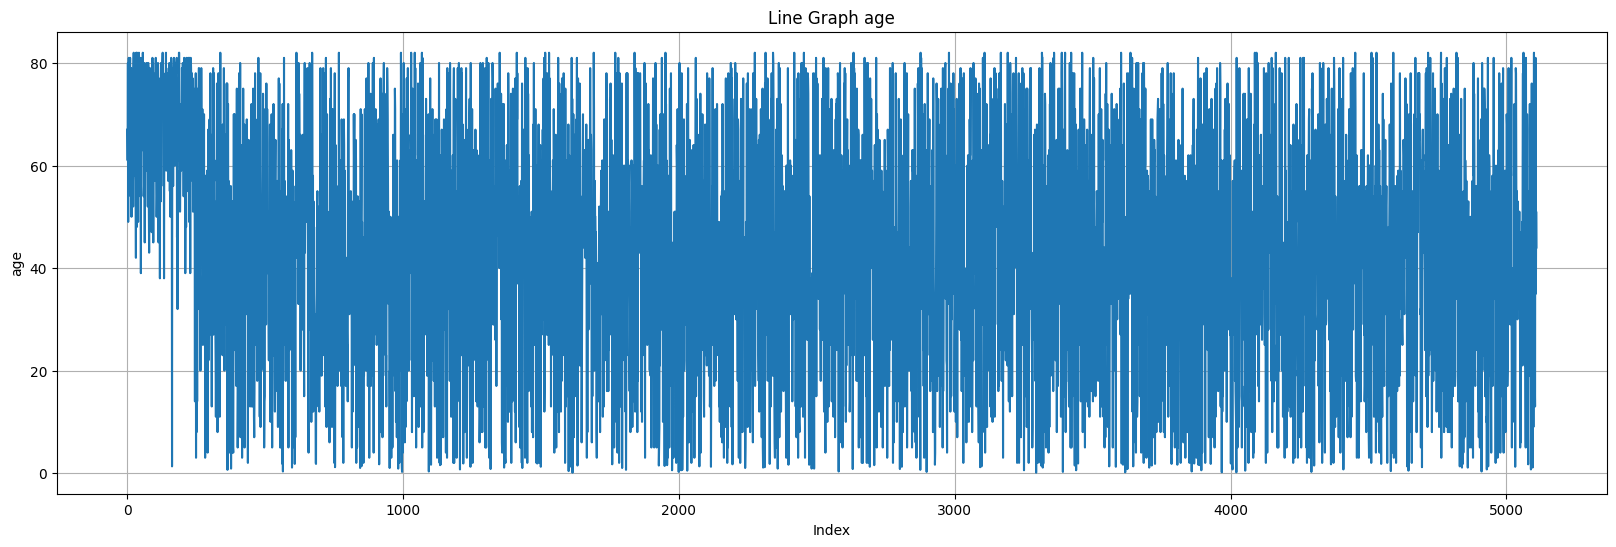

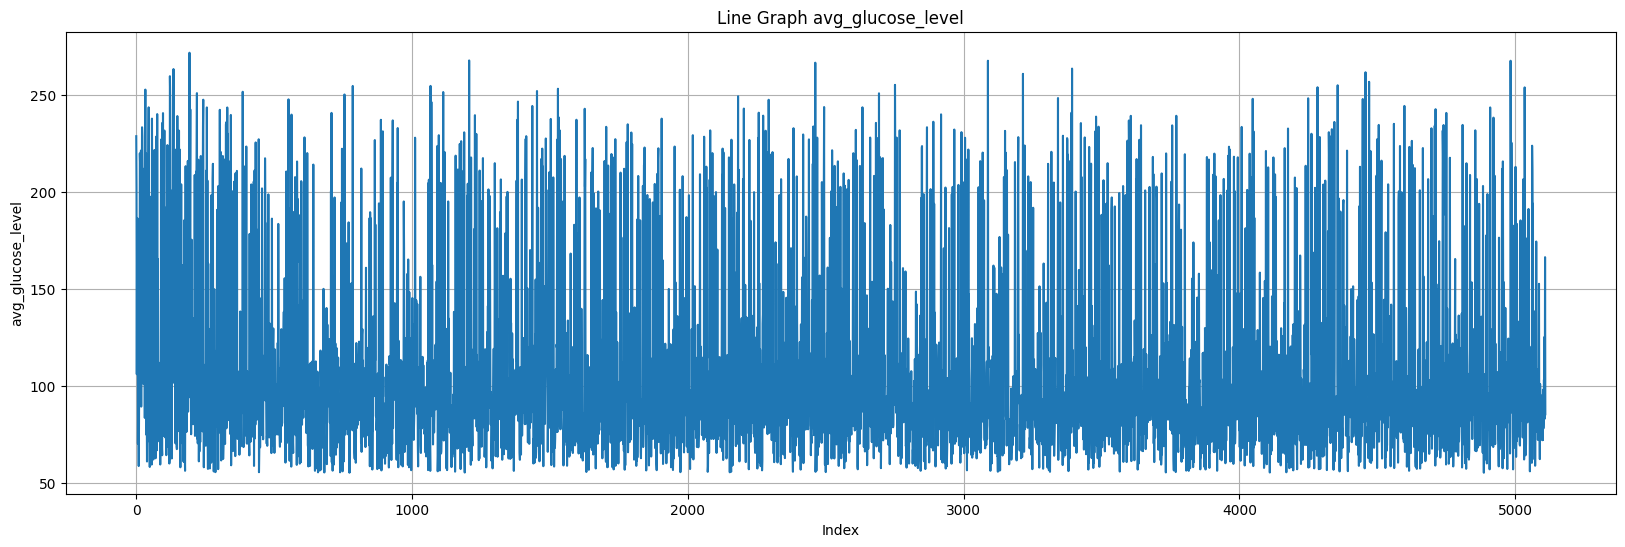

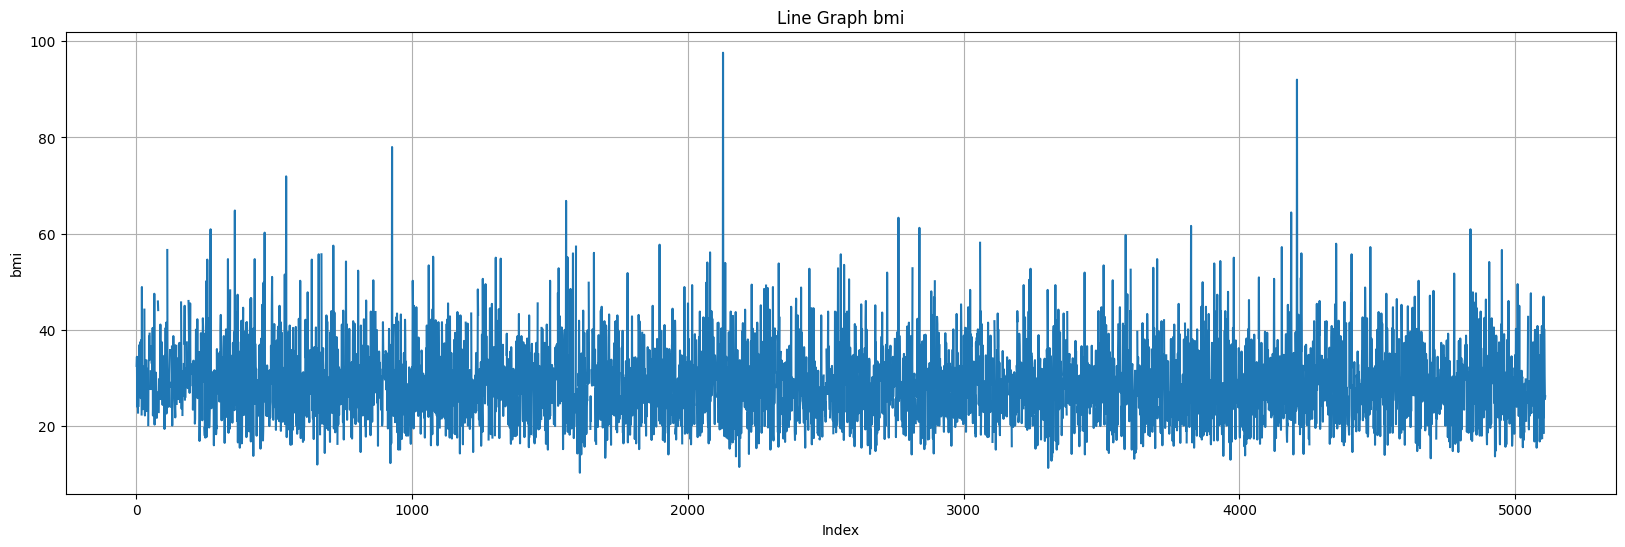

In [11]:
for column in df_numerik.columns:
    plt.figure(figsize=(20, 6))
    plt.plot(df[column])
    plt.title(f'Line Graph {column}')
    plt.xlabel('Index')
    plt.ylabel(column)
    plt.grid(True)  # Menampilkan grid
    plt.show()

### Histogram

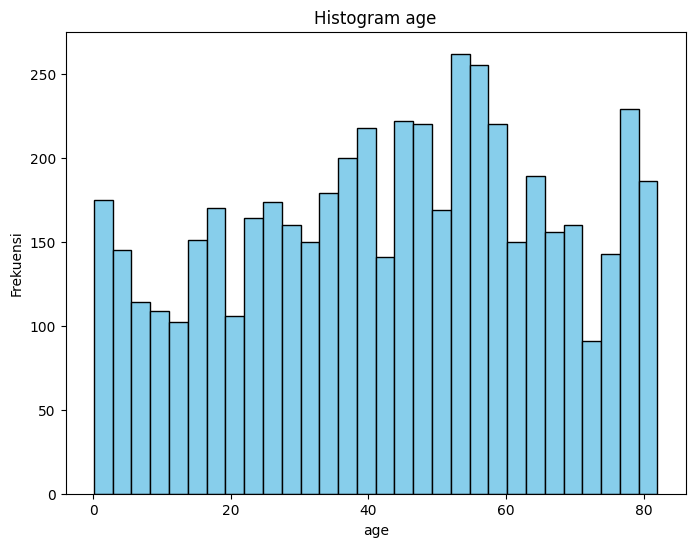

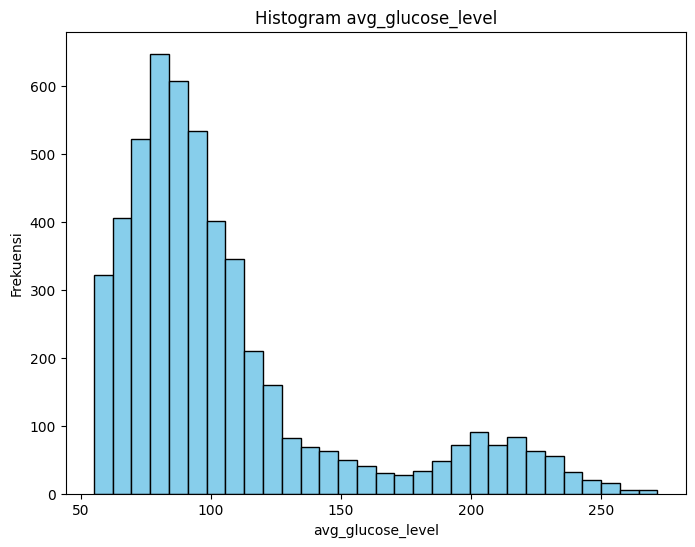

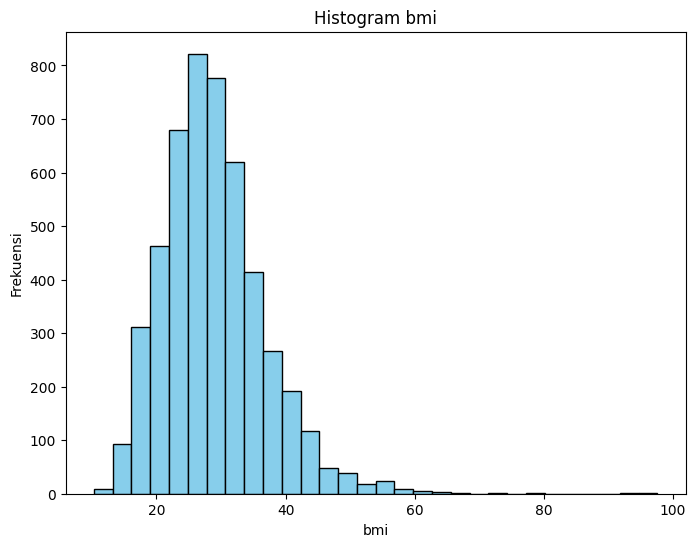

In [12]:
for column in df_numerik.columns:
    plt.figure(figsize=(8, 6))
    plt.hist(df[column], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histogram {column}')
    plt.xlabel(f'{column}')
    plt.ylabel('Frekuensi')
    plt.show()

### Boxplot

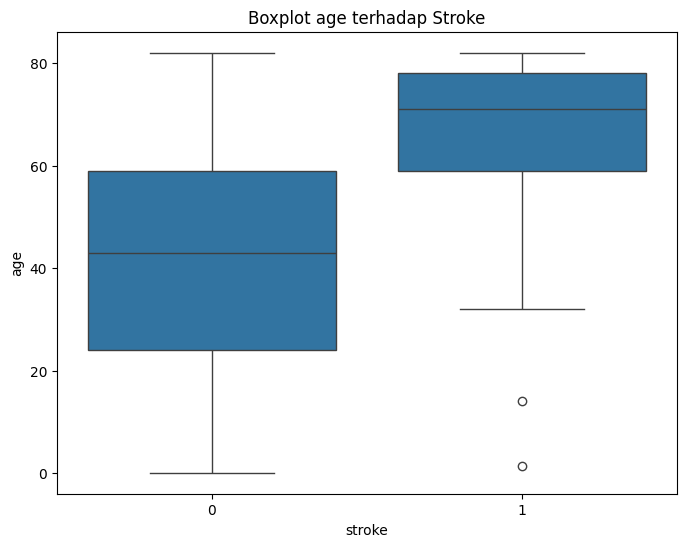

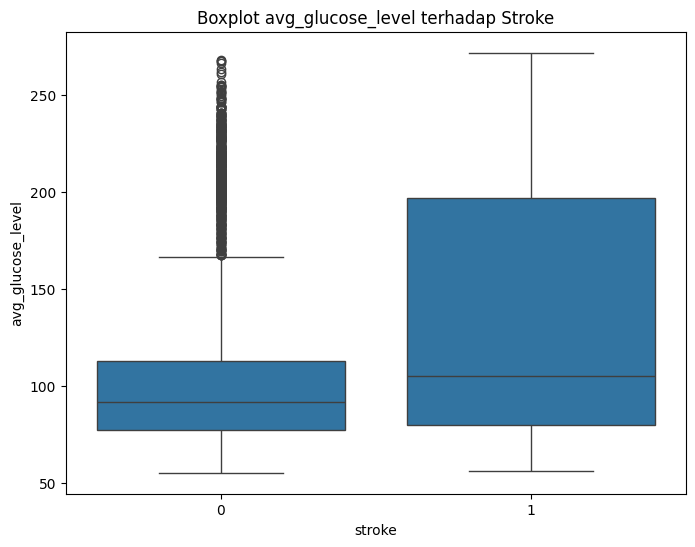

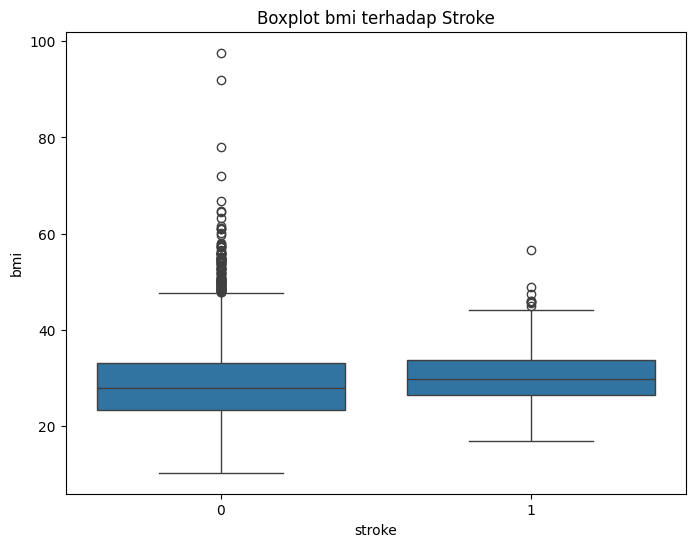

In [13]:
for column in df_numerik.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='stroke', y=column, data=df)
    plt.title(f'Boxplot {column} terhadap Stroke')
    plt.show()

### Scatter Plot

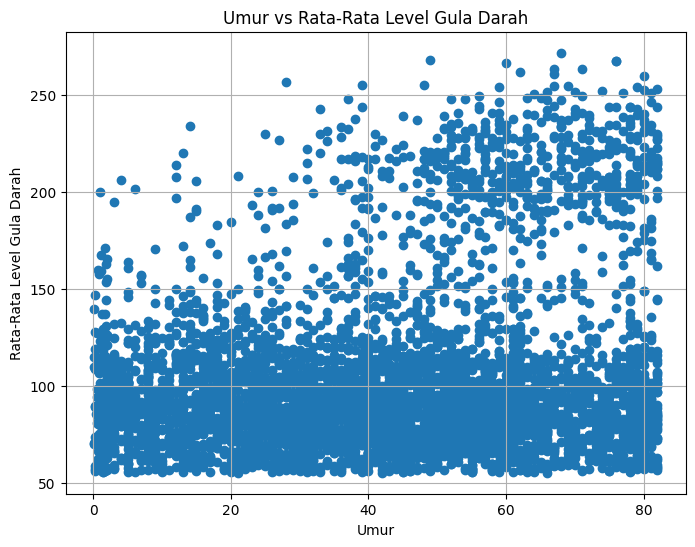

In [14]:
# Scatter plot: Umur vs Rata-Rata Level Gula Darah
plt.figure(figsize=(8, 6))
plt.scatter(df['age'], df['avg_glucose_level'])
plt.title('Umur vs Rata-Rata Level Gula Darah')
plt.xlabel('Umur')
plt.ylabel('Rata-Rata Level Gula Darah')
plt.grid(True)
plt.show()

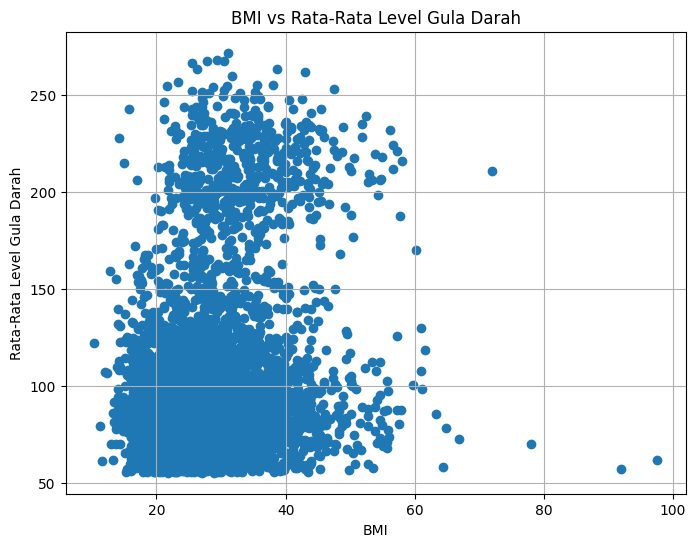

In [15]:
# Scatter plot: BMI vs Rata-Rata Level Gula Darah
plt.figure(figsize=(8, 6))
plt.scatter(df['bmi'], df['avg_glucose_level'])
plt.title('BMI vs Rata-Rata Level Gula Darah')
plt.xlabel('BMI')
plt.ylabel('Rata-Rata Level Gula Darah')
plt.grid(True)
plt.show()

# Data Preparation

## Encoding

In [16]:
categorical = ["gender", "ever_married", "work_type", "Residence_type", "smoking_status"]
label_encoder = LabelEncoder()
for column in categorical:
    df[column] = label_encoder.fit_transform(df[column])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   int32  
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   int32  
 6   work_type          5110 non-null   int32  
 7   Residence_type     5110 non-null   int32  
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   int32  
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int32(5), int64(4)
memory usage: 379.4 KB


## Data Filtering

In [18]:
df = df.drop(columns=['id'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int32  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int32  
 5   work_type          5110 non-null   int32  
 6   Residence_type     5110 non-null   int32  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   int32  
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int32(5), int64(3)
memory usage: 339.5 KB


In [19]:
df = df[df['gender'] != 2]
df['gender'].value_counts()

gender
0    2994
1    2115
Name: count, dtype: int64

## Handling Missing Values

In [20]:
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())
df.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000
mean,0.413975,43.229986,0.097475,0.054022,0.656293,2.167743,0.508123,106.140399,28.894560,1.376982,0.048738
std,0.492592,22.613575,0.296633,0.226084,0.474991,1.090398,0.499983,45.285004,7.698235,1.071626,0.215340
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,2.000000,0.000000,77.240000,23.800000,0.000000,0.000000
50%,0.000000,45.000000,0.000000,0.000000,1.000000,2.000000,1.000000,91.880000,28.400000,2.000000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,3.000000,1.000000,114.090000,32.800000,2.000000,0.000000
max,1.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,97.600000,3.000000,1.000000


## Menentukan Fitur

### Univariate Selection

In [21]:
X = df.drop(columns=['stroke'])
y = df["stroke"]

select_feature = SelectKBest(score_func=chi2, k='all')
fit = select_feature.fit(X,y)

dfscore = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScore = pd.concat([dfcolumns,dfscore],axis=1)
featureScore.columns = ['columns','score']
print(featureScore.sort_values(by='score',ascending=False))

             columns        score
1                age  3633.979423
7  avg_glucose_level  1719.368180
3      heart_disease    87.957296
2       hypertension    75.418319
4       ever_married    20.595671
8                bmi    15.866916
9     smoking_status     3.365543
5          work_type     2.927120
6     Residence_type     0.597112
0             gender     0.246877


### Feature Importance

[0.03274048 0.25540572 0.02108124 0.02094079 0.01652289 0.0550773
 0.03526537 0.25465778 0.22799788 0.08031056]


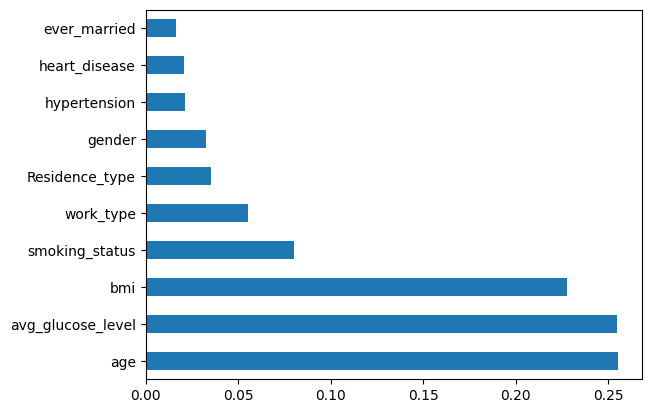

In [22]:
model = ExtraTreesClassifier()
model.fit(X,y)

print(model.feature_importances_)

feat_importance = pd.Series(model.feature_importances_,index=X.columns)
feat_importance.nlargest(10).plot(kind='barh')
plt.show()

### Correlation Matrix

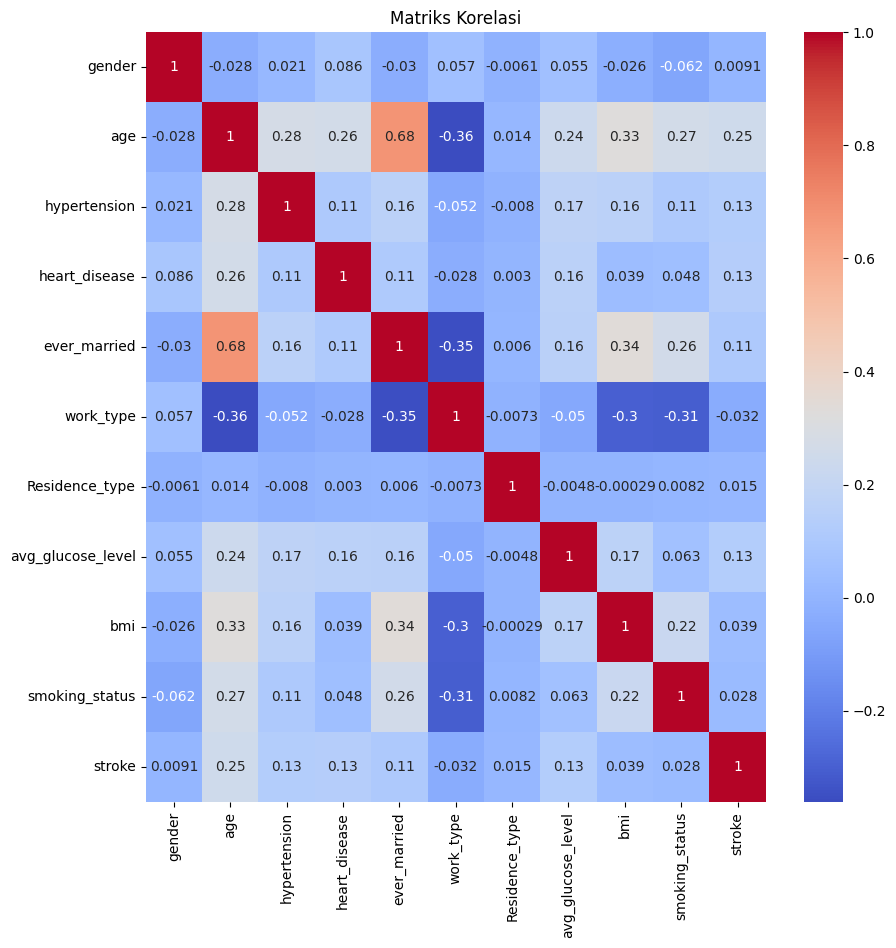

In [23]:
correlation_matrix = df.select_dtypes(include=['int', 'float']).corr()

plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriks Korelasi')
plt.show()

## Data Hasil Cleaning

In [24]:
df.sample(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2879,0,33.0,1,0,0,2,0,97.87,28.89456,3,0
4216,0,16.0,0,0,0,2,1,75.06,23.50000,2,0
3670,0,51.0,0,0,1,0,0,92.95,23.90000,2,0
2876,0,82.0,0,0,1,3,1,79.96,27.00000,1,0
4174,0,35.0,0,0,1,3,1,103.29,20.60000,2,0
436,0,62.0,0,0,1,3,1,180.63,31.80000,1,0
4254,0,10.0,0,0,0,4,1,77.43,16.20000,0,0
4188,0,27.0,0,0,1,2,0,57.96,64.40000,2,0
1389,1,12.0,0,0,0,4,0,86.00,20.10000,1,0
3002,1,60.0,0,0,1,2,0,65.16,30.80000,2,0


In [25]:
print(df['stroke'].value_counts())

stroke
0    4860
1     249
Name: count, dtype: int64


## Balancing Data dan Data Split

In [142]:
# Inisialisasi Fitur untuk Matrix Fitur X dan Target Y
X = df.drop(['smoking_status','work_type','Residence_type','gender','stroke'], axis=1)
y = df['stroke']

# Standardize Matrix Fitur X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [209]:
# Split Data dengan presentasi data test dan data train 20-80
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print('Sebelum OverSampling, total label 0: {}'.format(sum(y_train==0)))
print('Sebelum OverSampling, total label 1: {} \n'.format(sum(y_train==1)))

Sebelum OverSampling, total label 0: 3900
Sebelum OverSampling, total label 1: 187 



In [210]:
# Oversampling Stroke = 1
sm = SMOTE(random_state=2)
X_train, y_train = sm.fit_resample(X_train,y_train.to_numpy())
print('Setelah OverSampling, total label 0: {}'.format(sum(y_train==0)))
print('Setelah OverSampling, total label 1: {} \n'.format(sum(y_train==1)))

Setelah OverSampling, total label 0: 3900
Setelah OverSampling, total label 1: 3900 



# Modeling

In [211]:
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

### AdaBoost Clasifier

In [253]:
# Initialize AdaBoost Classifier
adb_model = AdaBoostClassifier(n_estimators=150, random_state=42)

# Train model
adb_model.fit(X_train, y_train)

# Buat prediksi berdasarkan test set
y_pred_adb = adb_model.predict(X_test)
# y_pred_prob_adb = adb_model.predict_proba(X_test)[:, 0]

In [254]:
# Classification Report
class_report = classification_report(y_test, y_pred_adb)
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.75      0.85       960
           1       0.16      0.71      0.26        62

    accuracy                           0.75      1022
   macro avg       0.57      0.73      0.55      1022
weighted avg       0.93      0.75      0.81      1022



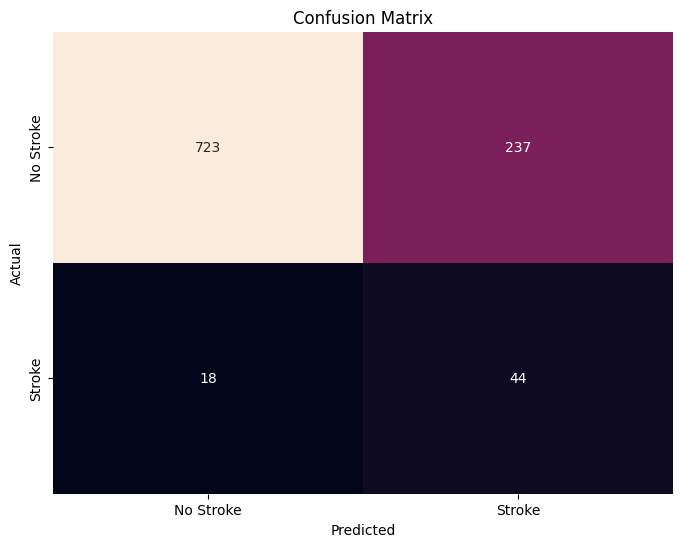

In [248]:
# Plot confusion matrix using seaborn
conf_matrix = confusion_matrix(y_test, y_pred_adb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cbar=False, xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### KNN

In [160]:
# Initialize KNN
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train model
knn_model.fit(X_train, y_train)

# Buat prediksi berdasarkan test set
y_pred_knn = knn_model.predict(X_test)
y_pred_prob_knn = knn_model.predict_proba(X_test)[:, 1]

In [161]:
# Classification Report
class_report = classification_report(y_test, y_pred_knn)
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.80      0.87       483
           1       0.11      0.43      0.17        28

    accuracy                           0.77       511
   macro avg       0.53      0.61      0.52       511
weighted avg       0.91      0.77      0.83       511



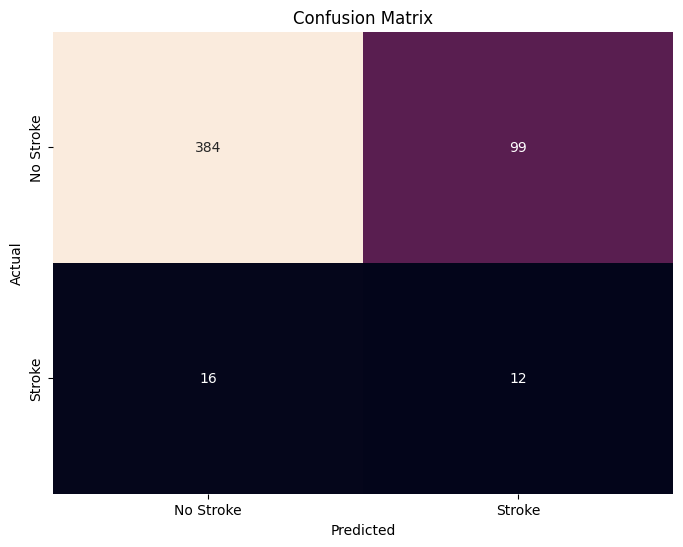

In [189]:
# Plot confusion matrix using seaborn
conf_matrix = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cbar=False, xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Random Forest Classifier

In [156]:
# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=50, random_state=0)

# Train model
rf_model.fit(X_train, y_train)

# Buat prediksi berdasarkan test set
y_pred_rf = rf_model.predict(X_test)
y_pred_prob_rf = rf_model.predict_proba(X_test)[:, 1]

In [157]:
# Classification Report
class_report = classification_report(y_test, y_pred_rf)
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.90      0.93       483
           1       0.11      0.21      0.15        28

    accuracy                           0.86       511
   macro avg       0.53      0.56      0.54       511
weighted avg       0.91      0.86      0.88       511



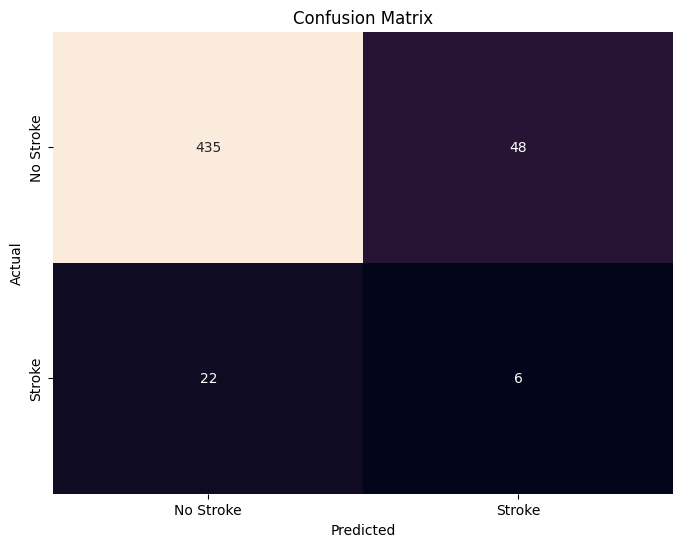

In [158]:
# Plot confusion matrix using seaborn
conf_matrix = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cbar=False, xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### SVM

In [175]:
# Initialize SVM
svm_model = SVC(kernel='linear', probability=True, random_state=0)

# Train model
svm_model.fit(X_train, y_train)

# Buat prediksi berdasarkan test set
y_pred_svm = svm_model.predict(X_test)
y_pred_prob_svm = svm_model.predict_proba(X_test)[:, 1]

In [176]:
# Classification Report
class_report = classification_report(y_test, y_pred_svm)
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.74      0.84       483
           1       0.13      0.68      0.22        28

    accuracy                           0.73       511
   macro avg       0.55      0.71      0.53       511
weighted avg       0.93      0.73      0.81       511



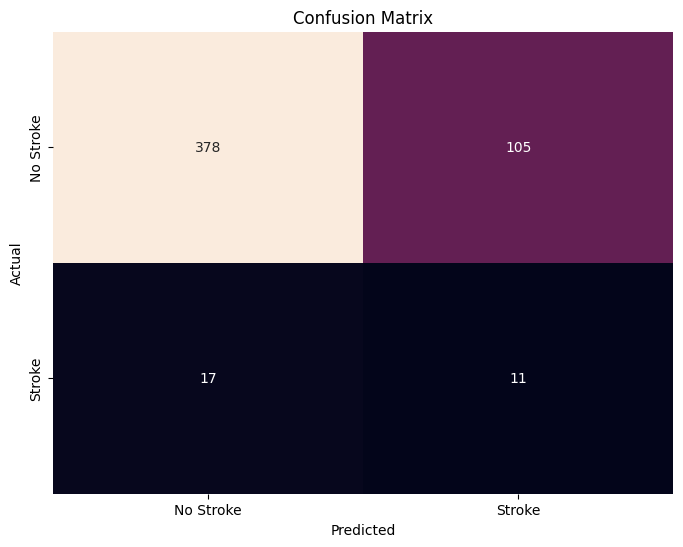

In [174]:
# Plot confusion matrix using seaborn
conf_matrix = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cbar=False, xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### ANN

In [231]:
# ANN 
model = Sequential()
model.add(Dense(12, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

c:\Users\sulth\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 12)             │            84 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 349 (1.36 KB)

 Trainable params: 349 (1.36 KB)

 Non-trainable params: 0 (0.00 B)

In [239]:
# Fit the model to the training data
model.fit(X_train, y_train, epochs=10, batch_size=64)

y_pred_proba = model.predict(X_test)
y_pred_binary = (y_pred_proba > 0.5).astype(int)

Epoch 1/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8733 - loss: 0.2947
Epoch 2/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8702 - loss: 0.2985
Epoch 3/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8753 - loss: 0.2940
Epoch 4/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8744 - loss: 0.2910
Epoch 5/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8754 - loss: 0.2928
Epoch 6/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8752 - loss: 0.2949
Epoch 7/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8689 - loss: 0.3033
Epoch 8/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8792 - loss: 0.2885
Epoch 9/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8655 - loss: 0.2992
Epoch 10/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8808 - loss: 0.2869
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 730us/step


In [240]:
# Classification Report
class_report = classification_report(y_test, y_pred_binary)
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.76      0.85       960
           1       0.14      0.63      0.23        62

    accuracy                           0.75      1022
   macro avg       0.56      0.69      0.54      1022
weighted avg       0.92      0.75      0.81      1022



In [111]:
# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC-AUC Score: {roc_auc:.2f}')

ROC-AUC Score: 0.76


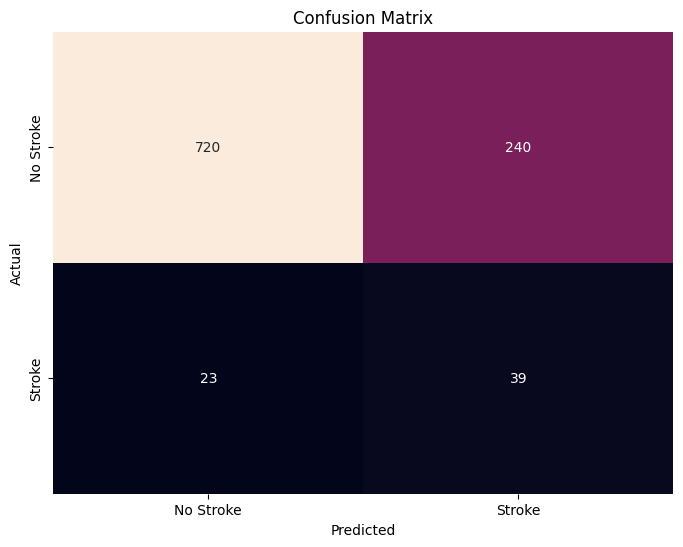

In [234]:
# Plot confusion matrix using seaborn
conf_matrix = confusion_matrix(y_test, y_pred_binary)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cbar=False, xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### XGBoost Classifier

In [241]:
# Initialize XGBoost classifier
xgb_model = xgb.XGBClassifier(learning_rate=0.1, bjective='binary:logistic', random_state=0, eval_metric='mlogloss')

# Train model
xgb_model.fit(X_train, y_train)

# Buat prediksi berdasarkan test set
y_pred = xgb_model.predict(X_test)
y_pred_prob = xgb_model.predict_proba(X_test)[:, 1]

c:\Users\sulth\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:160: UserWarning: [22:23:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "bjective" } are not used.

  warnings.warn(smsg, UserWarning)


In [242]:
# Classification Report
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.85      0.90       960
           1       0.14      0.39      0.21        62

    accuracy                           0.82      1022
   macro avg       0.55      0.62      0.56      1022
weighted avg       0.91      0.82      0.86      1022



In [243]:
# Calculate ROC-AUC score
roc_score = roc_auc_score(y_test, y_pred_prob)
print(f'ROC-AUC Score: {roc_score:.2f}')

ROC-AUC Score: 0.78


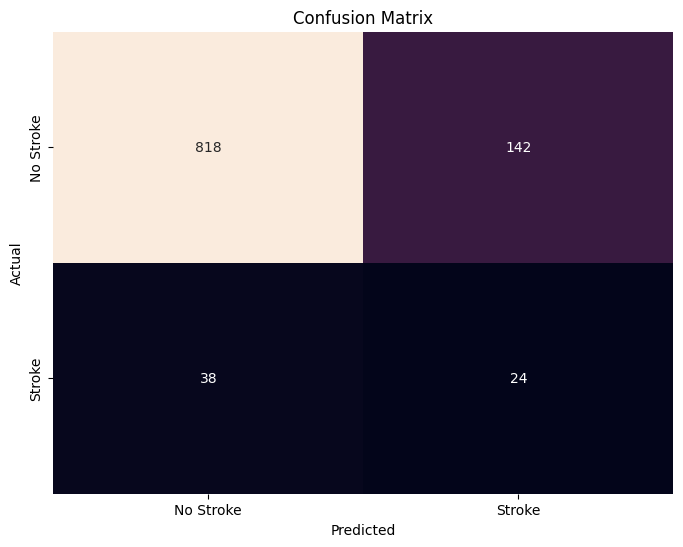

In [244]:
# Plot confusion matrix using seaborn
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cbar=False, xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [245]:
# Function unutuk preprocess and predict
def preprocess_and_predict(user_input, scaler, model, feature_columns):
    # Membuat  DataFrame dari user input
    user_df = pd.DataFrame([user_input], columns=feature_columns)
    
    # Convert categorical variables ke dalam dummy/indicator variables
    user_df = pd.get_dummies(user_df, drop_first=True)
    
    # Memastikan semua kolom sudah sesuai
    for col in feature_columns:
        if col not in user_df.columns:
            user_df[col] = 0
    
    # Sesuaikan kolom
    user_df = user_df[feature_columns]
    
    # Standardize features
    user_scaled = scaler.transform(user_df)
    
    # Predict probability stroke
    prediction = model.predict_proba(user_scaled)[:, 1]

    return prediction[0]

# Function untuk user input
def get_user_input():
    user_input = []
    user_input.append(input("Enter Gender (Male/Female): "))
    user_input.append(float(input("Enter Age: ")))
    choose = input("Enter Hypertension (Yes/No): ")
    if choose == 'yes' or 'Yes' or 'YES':
        hypertension = 1
    elif choose == 'no' or 'No' or 'NO':
        hypertension = 0
    user_input.append(hypertension)
    choose = input("Enter Heart Disease (Yes/No): ")
    if choose == 'yes' or 'Yes' or 'YES':
        heartdisease = 1
    elif choose == 'no' or 'No' or 'NO':
        heartdisease = 0
    user_input.append(heartdisease)
    user_input.append(input("Ever Married (Yes/No): "))
    choose = int(input("Enter Work Type (1. Children, 2. Governor Job 3. Never Worked, 4. Private, 5. Self-Employed): "))
    if choose == 1:
        worktype = 'children'
    elif choose == 2:
        worktype = 'Govt_job'
    elif choose == 3:
        worktype = 'Never_worked'
    elif choose == 4:
        worktype = 'Private'
    elif choose == 5:
        worktype = 'Self-employed'
    user_input.append(worktype)
    user_input.append(input("Enter residence type (Urban/Rural): "))
    user_input.append(float(input("Enter Average Glucose Level: ")))
    user_input.append(float(input("Enter BMI: ")))
    choose = int(input("Enter Smoking Status (1. Formerly Smoked, 2. Never Smoked, 3. Smokes): "))
    if choose == 1:
        smoking = 'formerly smoked'
    elif choose == 2:
        smoking = 'never smoked'
    elif choose == 3:
        smoking = 'smokes'
    user_input.append(smoking)
    
    return user_input

X = df.drop(['id','stroke'], axis=1)
feature_columns = X.columns

# Mendapatkan user input
user_input = get_user_input()

# Predict probability stroke
stroke_probability = preprocess_and_predict(user_input, scaler, xgb_model, feature_columns)
stroke_probability = stroke_probability*100
print(f'The predicted probability of stroke is: {stroke_probability:.4f}%')

KeyError: "['id'] not found in axis"

# Deployment

In [130]:
X = df.drop(['smoking_status','work_type','Residence_type','gender','stroke'], axis=1)
feature_columns = X.columns
print(feature_columns)

Index(['age', 'hypertension', 'heart_disease', 'ever_married',
       'avg_glucose_level', 'bmi'],
      dtype='object')


In [249]:
joblib.dump(adb_model,"model.pkl")
joblib.dump(scaler,"scaler.pkl")
feature_columns_df = pd.DataFrame(feature_columns)
feature_columns_df.to_csv('feature_columns.csv',index=False)